In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from env import username, host, password

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn
from explore import get_metrics_binary
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

from math import sqrt
from scipy import stats

-bring in clean data, drop columns we're not using, then split and stratify by churn.

In [31]:
df = get_telco_churn_data()


In [32]:
df = clean_telco_churn(df)

In [33]:
train, validate, test = prep_telco_churn(df)

In [57]:
x_col = ['fiber_optic', 'electronic_check', 'monthly_charges', 'tenure', 'one_year', 'monthly']
y_col = 'churn'

In [58]:
train.shape, validate.shape, test.shape

((3943, 29), (1691, 28), (1409, 28))

In [59]:
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,baseline_prediction
5707,5605-XNWEN,1,1,0,72,1,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4471,4355-CVPVS,0,1,1,56,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4994,3915-ODIYG,1,0,0,60,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3458,6575-SUVOI,1,1,0,25,1,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3818,9504-DSHWM,0,0,0,20,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [60]:
X_train, y_train = train[x_col], train[y_col]

X_validate, y_validate = validate[x_col], validate[y_col]

X_test, y_test = test[x_col], test[y_col]

In [61]:
X_train.head()

,fiber_optic,electronic_check,monthly_charges,tenure,one_year,monthly
5707,0,0,25.00,72,0,0
4471,1,0,88.90,56,1,0
4994,0,1,71.75,60,1,0
3458,0,0,69.50,25,0,1
3818,0,0,59.20,20,0,1


In [62]:
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [63]:
train['baseline_prediction'] = 1 #because I'm predicting more people did churn
round(accuracy_score(train.churn, train.baseline_prediction),2)

0.27

In [82]:
# Create the object
treeA = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=2, random_state=123)

In [83]:
# Fit the model
treeA = treeA.fit(X_train, y_train)

In [84]:
print(f'training score: {treeA.score(X_train, y_train):.2%}')
print(f'validate score: {treeA.score(X_validate, y_validate):.2%}')

training score: 76.13%
validate score: 75.28%


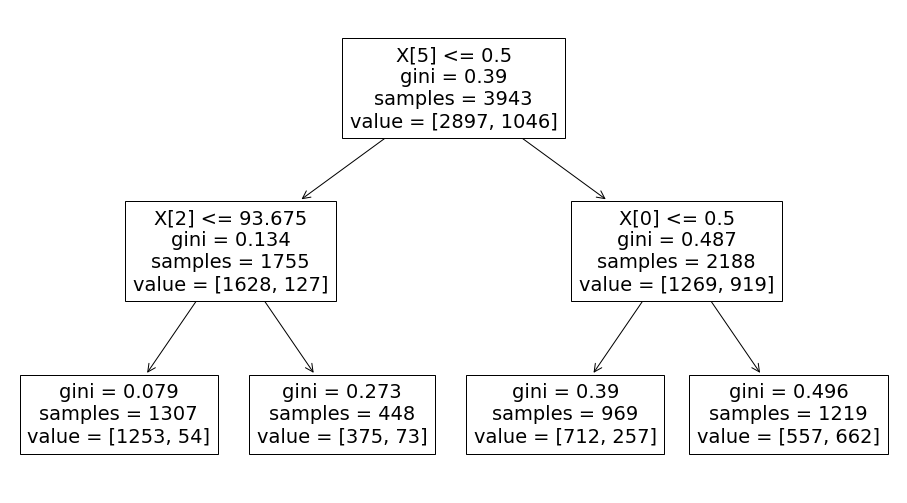

In [85]:
plt.figure(figsize=(16,9))
plot_tree(treeA)
plt.show()